In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("sp500_stocks.csv", low_memory=False)
columns = data.columns.tolist()

In [3]:
display(data)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0
1,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0
2,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0
3,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0
4,2010-01-08,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0
...,...,...,...,...,...,...,...,...
1643799,2022-12-19,ZTS,143.190002,143.190002,144.440002,142.009995,143.839996,1833700.0
1643800,2022-12-20,ZTS,142.470001,142.470001,143.100006,140.759995,142.710007,2045900.0
1643801,2022-12-21,ZTS,144.919998,144.919998,146.149994,142.779999,143.220001,1647500.0
1643802,2022-12-22,ZTS,145.029999,145.029999,145.100006,141.850006,143.710007,1541800.0


In [4]:
data.drop(inplace = True, columns = ['Date','Adj Close'])

In [5]:
data_filtered = data.dropna()
display(data_filtered)

,Symbol,Close,High,Low,Open,Volume
0,MMM,83.019997,83.449997,82.669998,83.089996,3043700.0
1,MMM,82.500000,83.230003,81.699997,82.800003,2847000.0
2,MMM,83.669998,84.599998,83.510002,83.879997,5268500.0
3,MMM,83.730003,83.760002,82.120003,83.320000,4470100.0
4,MMM,84.320000,84.320000,83.300003,83.690002,3405800.0
...,...,...,...,...,...,...
1643799,ZTS,143.190002,144.440002,142.009995,143.839996,1833700.0
1643800,ZTS,142.470001,143.100006,140.759995,142.710007,2045900.0
1643801,ZTS,144.919998,146.149994,142.779999,143.220001,1647500.0
1643802,ZTS,145.029999,145.100006,141.850006,143.710007,1541800.0


In [6]:
target = data['Close']
data_transformed = data_filtered.drop(columns=['Close'])
target.dropna(inplace=True)

In [7]:
encoder = OneHotEncoder()

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

num_columns = numerical_columns_selector(data_transformed)
categ_columns = categorical_columns_selector(data_transformed)

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer(
    [('one-hot-encoder', categorical_preprocessor, categ_columns),
    ('standard-scaler', numerical_preprocessor, num_columns)]
)

In [8]:
display(data_transformed)

,Symbol,High,Low,Open,Volume
0,MMM,83.449997,82.669998,83.089996,3043700.0
1,MMM,83.230003,81.699997,82.800003,2847000.0
2,MMM,84.599998,83.510002,83.879997,5268500.0
3,MMM,83.760002,82.120003,83.320000,4470100.0
4,MMM,84.320000,83.300003,83.690002,3405800.0
...,...,...,...,...,...
1643799,ZTS,144.440002,142.009995,143.839996,1833700.0
1643800,ZTS,143.100006,140.759995,142.710007,2045900.0
1643801,ZTS,146.149994,142.779999,143.220001,1647500.0
1643802,ZTS,145.100006,141.850006,143.710007,1541800.0


In [9]:
num_columns

['High', 'Low', 'Open', 'Volume']

In [10]:
categ_columns

['Symbol']

In [11]:
LR_model = make_pipeline(preprocessor, linear_model.LinearRegression())
LR_model.fit(data_transformed, target)

LR_prediction = LR_model.predict(data_transformed)
r2_score(target, LR_prediction)

0.9999250009200128

In [12]:
from sklearn.metrics import d2_absolute_error_score
d2_absolute_error_score(target, LR_prediction)

0.9920306200095392

In [13]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(target, LR_prediction)

0.48775930857864697

<AxesSubplot: >

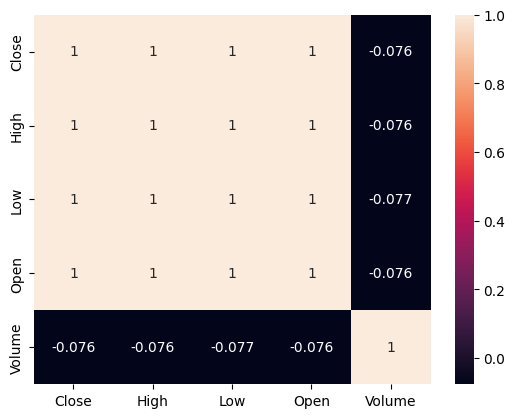

In [14]:
import seaborn as sn

corr_matrix = data.corr(numeric_only = True)
sn.heatmap(corr_matrix, annot=True)

In [28]:
columns = ['Symbol','High','Low','Open','Volume']

In [73]:
inputArray = ['GE',82.46,80.96,81.50,3290000]
frame1 = pd.DataFrame([inputArray], columns = columns)

prediction1 = LR_model.predict(frame1)
print(prediction1[0])

81.84423095349955
